# Pair Graphs

In [1]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from theory202104 import *
from helpers import graph

## Recap of 2021-04-21

Pair Cardinality:
$$ 
\begin{align}
n_T: & \Sigma^2 \rightarrow \mathbb{N} \cup \{- \infty \} \\
n_T(ab) & = \left\{ 
  \begin{array}{rcl} n & \text{ if } a \neq b \text{ and } T \cap \{a,b\} = n \times (ab)   \\ 
  -\infty & \text{ otherwise } \end{array}\right. 
\end{align}
$$

* The pair $(a,b)$ is paired in $T$ if $n_T(ab) \ge 0$
* The pair $(a,b)$ is unpaired in $T$ if $n_T(ab) \lt 0$
* The set  of all pairs in $T$ is $\mathcal{P}_T = \{ (a,b) | a,b \in \Sigma(T); n_T( a,b ) \ge 0 \}$

Sequences:

* $\mathcal{S}_T = \{ S \in \Sigma^* | S \text{ is sequence in } T \}$ (all sequences in $T$) 
* A sequence $S$ is a **maximal sequence in $T$** if is not a combination of other sequences in $T$: $\nexists R, S' \in \mathcal{S}_T; S \neq R $ such that $\Sigma(S') = \Sigma(S) \cup \Sigma(R)$. 
* $\overline{ \mathcal{S}_T } = \{ S \in \mathcal{S}_T | S \text{ is maximal sequence in } T \}$ (maximal sequences in $T$)

**Lemma (consecutive sequence order)**: $s_j$ is the $j$-esim element of a sequence $S$ in $T$ $\iff$ there are exactly $j-1$ pairs $(x, s_j)$ paired in $T$ where $n_T(S) = n_T(x, s_j)$. All such $x$ lies inside $S$.

In [2]:
pandasPair( pairs_in_trace("abcabcabc")  ).T

,"(b, b)","(b, a)","(a, b)","(b, c)","(c, b)","(a, a)","(a, c)","(c, a)"
pairs,-1,-1,3,3,-1,-1,3,-1


## Equivalent Pair Graph

Let be $G_T=(V,E,n_T)$ a directed weighted graph where:

* $V = \Sigma(T)$
* $E = \Sigma(T) \times \Sigma(T) $
* $n_T( e )= n_T( ab )$ the cardinality of $e=(a,b)$

$G_T$ is called the equivalent pair graph. By construction the non negative edges are exactly the pairs of the trace: 

$\mathcal{P}_T = \{ (a,b) | a,b \in \Sigma(T); n_T( a,b ) \ge 0 \} =  \{ e | e \in E; n_T( e ) \ge 0 \}$

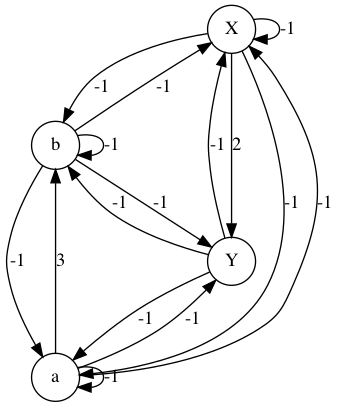

In [3]:
G_T = pair_graph("abXYabXaYb")
graph(G_T)

## n-layer of a pair graph

An n-layer of $G_T$ is the directed subgraph where $n_T(e) = n$, formally defined as:

$G_T^n = (V_T^n, E_T^n)$ where:

* $E_T^n = \{ e \in E(G_T) | n_T(e) = n \}$
* $V_T^n = \Sigma( E_T^n ) $ 

Note how the n-layer captures all pairs $(a,b)$ with $n_T(a,b) = n$

In [4]:
G_T = pair_graph("abXYabXaYb")

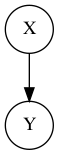

In [5]:
graph( n_layer(G_T, 2) )

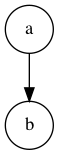

In [6]:
graph( n_layer(G_T, 3) )

## Sequences in Pair Graphs

Any sequence $S=s_1 ... s_m$ in $T$ is totally contained in the n-layer with $n = n_T(S)$, by using the property that all its pairs has the same cardinality $n_T(S)$. 

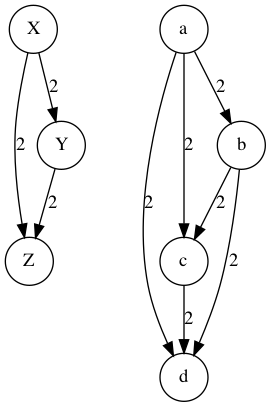

cardinality of abcd in T = 2
cardinality of XYZ in T = 2


In [7]:
T="abcdabcdXYZXYZ"

G_T = pair_graph(T)
graph( non_negative_graph(G_T) )

print('cardinality of abcd in T = {}'.format( sequence_cardinality('abcd', T) ))
print('cardinality of XYZ in T = {}'.format( sequence_cardinality('XYZ', T) ))

## Sequence inference using cliques

By the lemma of consecutive sequence order, (... long way from here...) then the cliques ordered by its inDegree corresponds to maximal sequences with cardinality $n$.

Based on the previous example, the cliques in the 2-layer $G^{n=2}_T$ are the following:

In [8]:
G_T_2 =  n_layer(G_T, 2)
cliques = cliques_from_layer( G_T_2 )
cliques

[['X', 'Z', 'Y'], ['d', 'b', 'a', 'c']]

Let's take the first clique: and inspect how its inDegrees looks like.

In [9]:
degrees=sorted( G_T_2.in_degree() , key=lambda u: u[1], reverse=False)

for clique in cliques:
    print([ (node,deg) for node,deg in degrees if node in clique ])

[('X', 0), ('Y', 1), ('Z', 2)]
[('a', 0), ('b', 1), ('c', 2), ('d', 3)]


Note that by using the original layer graph, not all cliques can be ordered by its inDegree as $0,1,...,|clique|-1$. For example in $T=aXYbaYXb$ the is the cliques $\{a,Y,B\}$ and $\{a,X,B\}$  which has not correct degree ordering.

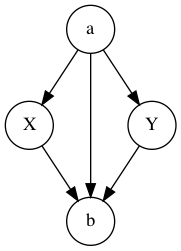

[('a', 0), ('X', 1), ('b', 3)]
[('a', 0), ('Y', 1), ('b', 3)]


In [10]:
G_T=pair_graph('aXYbaYXb')
G_T_2 =  n_layer(G_T, 2)
graph( G_T_2 )
cliques=cliques_from_layer( G_T_2 )
degrees=sorted( G_T_2.in_degree() , key=lambda u: u[1], reverse=False)

for clique in cliques:
    print([ (node,deg) for node,deg in degrees if node in clique ])

However, the subgraph induced by the clique actually has correct degree ordering. 

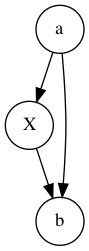

In [11]:
indD = induced_graph(G_T_2, ['b', 'a', 'X'])
graph( indD )

Then the procedure must be improved as:

In [12]:
for clique in cliques:
    degrees=sorted( induced_graph(G_T_2, clique).in_degree() , key=lambda u: u[1], reverse=False)
    print([ (node,deg) for node,deg in degrees if node in clique ])

[('a', 0), ('X', 1), ('b', 2)]
[('a', 0), ('Y', 1), ('b', 2)]


The procedure above is included in this function:

In [13]:
sequences_from_pair_graph( G_T )

{2: [['a', 'X', 'b'], ['a', 'Y', 'b']]}

## More sequence detection examples

In [14]:
G_T=pair_graph('abc')
sequences_from_pair_graph( G_T )

{1: [['a', 'b', 'c']]}

In [15]:
G_T=pair_graph('abc123abc')
sequences_from_pair_graph( G_T )

{1: [['1', '2', '3']], 2: [['a', 'b', 'c']]}

In [16]:
G_T=pair_graph('abc123abc123123')
sequences_from_pair_graph( G_T )

{3: [['1', '2', '3']], 2: [['a', 'b', 'c']]}

In [17]:
G_T=pair_graph('1ab2c3a12312b3c')
sequences_from_pair_graph( G_T )

{3: [['1', '2', '3']], 2: [['a', 'b', 'c']]}

In [18]:
G_T=pair_graph('aXYbaYXb')
sequences_from_pair_graph( G_T )

{2: [['a', 'X', 'b'], ['a', 'Y', 'b']]}

## Overhead in Python

The experiments below shows no significant overhead by using pandas or networkx library.

In [19]:
for i in [100,200,300,400,500]:
    print("\n\n computations with sigma={}\n".format(i))
    %time a=pairs_in_trace( range(i) )
    %time a=pandasPair( pairs_in_trace( range(i) )  )
    %time a=pair_graph( range(i) )



 computations with sigma=100

CPU times: user 35.6 ms, sys: 1.28 ms, total: 36.9 ms
Wall time: 36.1 ms
CPU times: user 63.9 ms, sys: 1.53 ms, total: 65.4 ms
Wall time: 65.6 ms
CPU times: user 72.7 ms, sys: 1.75 ms, total: 74.5 ms
Wall time: 74.5 ms


 computations with sigma=200

CPU times: user 248 ms, sys: 2.31 ms, total: 250 ms
Wall time: 250 ms
CPU times: user 354 ms, sys: 5.83 ms, total: 360 ms
Wall time: 360 ms
CPU times: user 401 ms, sys: 7.93 ms, total: 409 ms
Wall time: 409 ms


 computations with sigma=300

CPU times: user 823 ms, sys: 6.25 ms, total: 830 ms
Wall time: 830 ms
CPU times: user 1.08 s, sys: 14.3 ms, total: 1.09 s
Wall time: 1.09 s
CPU times: user 1.18 s, sys: 16.9 ms, total: 1.19 s
Wall time: 1.2 s


 computations with sigma=400

CPU times: user 2.01 s, sys: 7.85 ms, total: 2.02 s
Wall time: 2.02 s
CPU times: user 2.47 s, sys: 20.5 ms, total: 2.49 s
Wall time: 2.5 s
CPU times: user 2.66 s, sys: 30.6 ms, total: 2.69 s
Wall time: 2.7 s


 computations with sigma